In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [7]:
from starter.ml.data import process_data
from starter.ml.model import train_model, compute_model_metrics, inference

In [37]:
df = pd.read_csv("data/census.csv")
df.columns = df.columns.str.replace(' ', '')
train, test = train_test_split(df, test_size=0.20)

cat_features = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]


In [4]:
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [66]:
X_train, y_train, encoder, lb1 = process_data(
    train, categorical_features=cat_features, label="salary", training=True
)

X_test, y_test, encoder, lb = process_data(
    test, categorical_features=cat_features, label="salary", training=False, encoder=encoder
)

y_test_bin = lb1.fit_transform(y_test.values).ravel()

/Users/schwabw/anaconda3/envs/mlops/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Precision is 0.6864406779661016, recall is 0.25812619502868067, fbeta is 0.37517369152385366


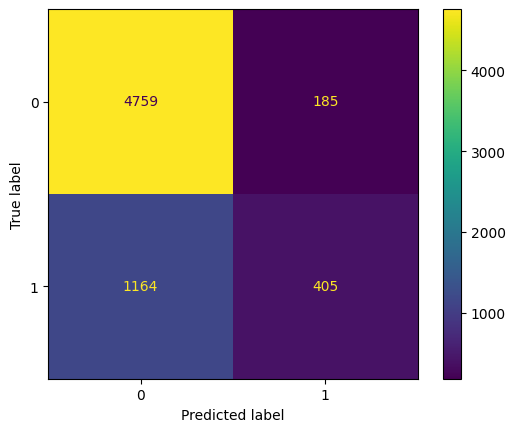

In [75]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision, recall, fbeta = compute_model_metrics(y_test_bin, y_pred)
print("Precision is {}, recall is {}, fbeta is {}".format(precision, recall, fbeta))
cm = confusion_matrix(y_test_bin, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()

Precision is 0.7330383480825958, recall is 0.6335245379222435, fbeta is 0.6796581196581197


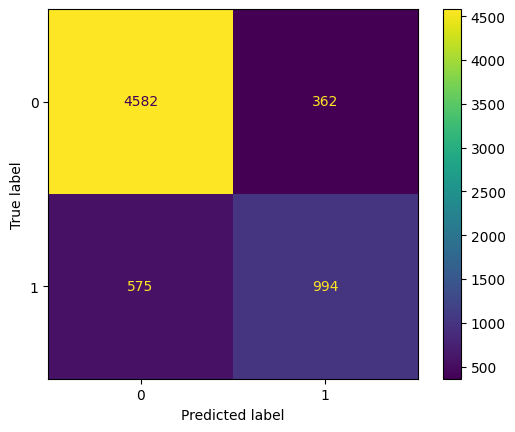

In [87]:
clf = RandomForestClassifier(max_depth=None, n_estimators=100, max_features=None, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision, recall, fbeta = compute_model_metrics(y_test_bin, y_pred)
print("Precision is {}, recall is {}, fbeta is {}".format(precision, recall, fbeta))
cm = confusion_matrix(y_test_bin, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()

In [89]:
X_test.shape

(6513, 108)

In [91]:
import numpy as np
array_2d = np.random.rand(6513, 108)

In [92]:
array_2d.shape

(6513, 108)